In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [191]:
PROP_ACCELERATE = 0.1
DISTURBANCE_MAGNITUDE = 0.05
TERMINAL_VELOCITY = -20
g = -9.8

def update(x_0, v, a, delta_t):
    val = x_0 + v*delta_t+(a*delta_t**2)/2
    #print("{}, {}, {}".format(val, disturbance_factor, val*disturbance_factor))
    velocity = (val - x_0) / delta_t
    with_error = val
    if(val > 1000):
        disturbance = random.uniform(-1,1)*DISTURBANCE_MAGNITUDE*val
        with_error += disturbance
    return val, velocity, with_error

DELTA_T = 0.1 #interval in seconds

def generate_data(length):
    altitude = []
    x = 0
    velocity = 0
    a_0 = 3.6 * 10**3 / 200
    for i in range(int(length / DELTA_T)):
        if (x < 0):
            break
        if (i < length * PROP_ACCELERATE / DELTA_T):
           # print("accelerating")
            x, velocity, noisy = update(x, velocity, a_0+g, DELTA_T)
            altitude.append(noisy)
        else:
            #print("decelarating")
            x, velocity, noisy = update(x, velocity, g, DELTA_T)
            altitude.append(noisy)
    return altitude
    

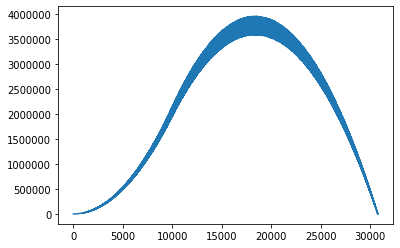

In [192]:
length = 10000 # time period in s
altitude = generate_data(length)

plt.plot(np.arange(len(altitude)), altitude)
#ax.set_xticks(range(length))

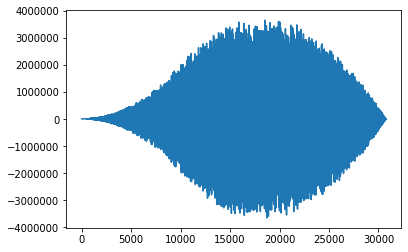

In [193]:
velocity = [(altitude[i+1] - altitude[i])/DELTA_T for i in range(len(altitude)-1)]
plt.plot(range(len(velocity)), velocity)

$$x_k = A x_{k-1} + G a_k$$

In [221]:
x = np.array([[1.],  #pos
              [0.],  # velocity
              [-9.8]]) # accel

A = np.matrix([[1,DELTA_T, DELTA_T**2 / 2],  #state transition matrix
              [0,1, DELTA_T],
              [0, 0, 1]])

# vector of measured data
m = np.array([[0], # position
              [0]])# acceleration

# maps true variable to measured data
H = np.matrix([[1, 0, 0],
               [0, 0, 1]])

sigma_b = 0.03
sigma_a = 0.15

R = np.matrix([[sigma_b**2, 0],
              [0, sigma_a**2]])

Q = np.matrix([[0, 0, 0],
               [0, 0, 0],
               [0, 0, 1]])

P = np.identity(3)

In [225]:
print(np.shape(A))
print(np.shape(x))
print(np.shape(H))
print(np.shape(P))
print(np.shape(K))

(3, 3)
(3, 1)
(2, 3)
(3, 3)
(3, 2)


In [223]:
print(np.shape(np.matmul(A,x)))
print(np.shape(np.matmul(A,x) + G))
z = np.array([[1], [1]])
resid = z - np.matmul(H,np.matmul(A,x))
print(np.shape(np.matmul(H, x)))
print(np.shape(resid))
print(np.shape(K))
print(np.shape(np.matmul(A, x) + np.matmul(K, resid)))

(3, 1)


ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

In [230]:
# converge K
for i in range(50):
    S = (H@P)@H.T + R
    K = (P@H.T)@np.linalg.inv(S)
    P = (np.identity(3) - K@H)@P
    P = A@(P@A.T) + Q
    
print(K)
print(H)
print(P)

shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P: (3, 3)
shape S: (2, 2)
shape K: (3, 2)
shape P:

In [212]:
def noise(mean, std):
    return np.random.normal(mean, std)

def predict():
    global x
    global P
    global A
    global G
    x = np.matmul(A,x) + G * g
    #print("shape of x in predict: {}".format(np.shape(x)))
    P = np.matmul(A, np.matmul(P,A.T)) + Q

def update_estimate(z):
    global H
    global A
    global K
    global x
    ax = np.matmul(A,x)
    resid = z - np.matmul(H,ax)
    #print("shape of resid: {}".format(np.shape(resid)))
    x = ax + np.matmul(K, resid)
    #print("shape of x: {}".format(np.shape(x)))

def update_gain():
    global S
    global H
    global P
    global K
    S = np.matmul(H, np.matmul(P,H.T)) #+ sigma_z
    K = np.matmul(P, np.matmul(H.T, np.linalg.inv(S)))
    P = np.matmul((np.identity(len(K[0])) - np.matmul(K,H)), P)
    
def kalman(data):
    filtered = []
    for j in range(len(data)-1):
        i = j+1
        predict()
        update_gain()
        curr = data[i]
        curr_vel = (data[i] - data[i-1])/ DELTA_T
        update_estimate(curr)
        print(x[0,0])
        filtered.append(x[0,0])
    print(K)
    return filtered

In [213]:
filtered_data = kalman(altitude)

0.123
0.246
0.4100000000000011
0.615
0.861
1.1479999999999997
1.475999999999996
1.8450000000000006
2.254999999999999
2.705999999999999
3.1979999999999933
3.730999999999998
4.305000000000003
4.9199999999999955
5.575999999999999
6.273
7.010999999999989
7.790000000000003
8.610000000000005
9.47100000000001
10.37300000000001
11.316000000000013
12.300000000000002
13.32500000000002
14.391000000000025
15.49800000000003
16.646000000000033
17.835000000000036
19.06500000000004
20.336000000000045
21.64800000000005
23.001000000000055
24.39500000000006
25.830000000000066
27.306000000000072
28.823000000000025
30.381000000000142
31.980000000000093
33.6200000000001
35.3010000000001
37.0230000000001
38.7860000000001
40.59000000000002
42.435000000000166
44.321000000000176
46.24800000000006
48.216000000000165
50.22500000000002
52.275
54.36599999999997
56.49799999999994
58.67099999999965
60.88499999999987
63.13999999999983
65.43599999999978
67.77299999999973
70.15099999999967
72.56999999999961
75.029999999

12671.037000519218
12897.334659994543
13916.46217799222
14024.89989564782
13395.481653773486
13697.730600996483
13854.358130159539
13325.674737461362
12924.70279737146
14228.684378482414
13883.698311717731
14570.814814217867
13993.691806838207
13130.012869855067
14222.210399847178
14079.341791524734
14149.74540172554
14100.19789870883
13474.321227202592
14305.18627327018
13800.721521107507
14257.203131015367
14050.122126901904
12820.591696888203
14166.190759029942
14654.541247274674
14057.20575233559
14507.841719919092
13732.978538930018
14778.549827272727
14183.209768738692
12114.591030211242
13929.56500230854
14091.667217243556
14085.895682888671
14636.782264233883
15460.128178897145
13977.79744549267
14298.640516250147
15292.260210744727
14602.137085968514
13982.02422070499
575.3712845606351
96304.9227236015
105397.45244335344
-81456.30735110947
-41468.106519289446
14206.696145053967
15452.247543673886
15380.450957568964
14713.44461758267
14545.968199979554
15285.68449838251
15131.3

51798.20812991011
55477.88576376339
55398.695694755224
89713.55427447626
99728.2327703609
56745.60181362045
51485.01425805073
64618.07108467334
24644.649551133363
337164.939357505
340121.23527607
-165338.96382242098
-145918.85299423774
-126498.9381660545
-57964749.66120843
63784637.53378481
-126559045.36070608
-6839427.856743783
58227.106289278716
54834.462075876116
57448.05875415871
57319.103085452036
56386.52339552725
54453.958724363765
62697.397814348486
50387.84045573545
60802.17512852359
40801.63757780513
58732.658510360896
54094.29518350375
54162.13699100116
56396.241196784955
61076.175168652655
54864.81190705572
61294.29514490214
59135.99011912043
63357.81861296543
57420.55564458492
53771.95930825897
64672.1088233638
77520.36143382076
26571.66381506568
34771.88422881993
58271.06583331881
59988.241015853055
19801.320582054483
48981.23168007286
55230.244373432375
50873.61475289626
62106.16723827188
35945.05308776599
45521.04214785226
55096.83520793854
42752.53943958178
52327.94049

127540.9609525637
119713.25843007199
122112.22286955077
133991.3793554673
125511.79281335468
136094.7812418657
132332.7952390378
131374.5791214767
129347.5410266408
124630.07632740132
134676.65771365928
131264.65820736781
127295.67005155118
121790.90182471434
127395.5735753189
133157.50527796888
129261.11350665134
124165.54239915941
148379.26217808254
170109.64417135814
202295.58474041137
131070.95059401775
134345.07007521164
161337.10900253005
130156.0372439225
126344.11829028663
140515.8805879724
124286.29713140576
615737.6064873671
125339.78408047784
100317.49523510059
120688.21064205954
123652.84240189947
131589.62631240205
132818.2949460839
129622.53709834782
133938.70785817178
159345.18003539403
184751.4562126163
166899.3566189134
134235.62873308713
38846.20654845386
65692.98929507128
92539.5760416887
126808.19601378124
130002.38247695085
147057.9267581508
136495.81931450914
108418.28290284473
123889.00318409338
130605.68499439403
139538.71752442568
128819.07008172391
123117.3588

228376.28108906184
229493.19078479792
226269.04581958233
224875.87492013516
236651.57500908367
219248.8876725221
226878.83184727727
225543.36204421503
219541.67067305758
216827.0331407242
224163.33565209463
218683.47553560368
234064.0009873972
226496.22499470966
240255.4605120504
235377.20295520144
232301.08849744315
217905.5402272437
228531.4776171648
222424.7439502067
240373.01461927587
237635.14908632956
221559.937681754
224631.26577514756
237669.14771848262
231551.94352920202
227951.0236551872
230995.6808271858
234973.99003329384
238822.28011934532
230149.01066148194
232312.98010486376
226385.90695083432
235011.9336108694
232256.9655647095
232354.64122807916
232585.46226558066
242539.08762634842
238604.273318001
235574.15813368806
237025.91444091906
243094.48014856508
237040.69600711777
221584.35164298106
239466.60749112105
230493.46597287667
235917.38099199167
235790.82358899128
228300.640598141
239039.5040794436
223511.1803919305
244136.37550862698
237575.55115780793
233154.97264

390432.3901972572
363915.25306279724
443521.7204191822
346001.0214974566
422771.78909431293
-71535.02535818389
-8014.1728287686565
410257.3019196929
362225.89947645785
368092.09200690396
363478.86576720455
339013.34290326654
369348.0018121935
349991.458951918
362577.9982871432
376158.3287494468
353087.85992241546
346180.603364154
364218.42996103613
353005.6018103509
338886.12302915205
360738.67876993056
348466.63851569296
372463.0607170055
370125.8615212876
344035.6552632855
355217.47369960207
342928.7927934187
349242.9728825589
351929.6045723588
356081.7750458362
368514.78594031394
373083.69070040126
345460.743353655
350998.78948958486
363032.3088856095
349790.2560655977
368107.1027687238
346692.75924029655
346054.4405358043
345519.0976587596
374527.4136091703
358156.14786716056
352361.8170097935
360534.06845980434
367214.3344612619
353085.56412458693
368033.5759430121
360928.46257040906
364763.76635967
358897.829822425
377870.15002974303
381223.5683320816
366319.4152674583
377437.580

506901.345988621
526634.9482301254
540657.3292987703
517849.350244905
524048.5521494416
486321.33736556774
510239.616779981
433230.3343413373
511273.77919051447
529876.4724472415
503032.25798402785
607017.4652312179
711002.476478408
274303.5601552627
318728.9144207132
432166.0038385013
545602.8972562894
659039.5946740775
534789.7060422458
1521112.1180486984
513648.4983518133
454494.7674122222
492184.22842179687
492271.365653128
492209.8365695637
486517.0439221045
517757.0460892393
506562.6623105537
502238.34152168507
435504.9743408486
541471.5038237021
502879.0019088669
600247.1708953569
-1010637.0202533515
536438.6526165921
302696.0860730258
1082334.825194826
-166818.16637841868
34458.027716486475
519450.93419552373
624546.1887014543
529631.3682513247
92459.82330240891
365925.7413844313
511214.3851581167
509139.1278521258
502254.20803124434
524261.1061516437
496309.7189682759
534773.0726659389
530195.9466743177
483441.36742443516
506681.1823128467
516329.047371831
491194.65494827804
5

690645.6570523864
705480.6992426564
685603.921401046
673161.166855576
706507.9557849228
688624.643068915
691086.1185823707
713256.8106411688
698452.7102262764
709193.1738441508
693630.0625673672
697843.883217027
664848.0501998451
689786.1395759372
685284.4970782227
713375.3663600823
664040.1152929593
675906.586906304
713074.4433761843
690571.7268439177
678286.1751097584
672100.700238943
704730.2579018733
655522.86291721
702433.5901772634
708282.8104609982
629058.4208273862
686350.5732177218
662001.7331769296
694298.9181123927
860310.5427232718
1004600.3809434305
698771.7012663314
840627.0567431446
692162.9599236139
686409.6340963596
692108.3108375372
817486.5626137804
-1288893.1865859947
661170.8236283441
668589.1858718579
678958.406729481
684738.4535707314
706122.7864371665
696134.926551626
707968.0629308546
683737.8974694499
683639.1742421107
709438.0073745709
758140.659655672
686179.4288556124
546653.0840318277
692248.6794122413
775742.0217612622
695058.304325819
665356.7628828669
7

872671.8297870221
844485.4925553132
864469.9273097387
863571.2884845017
904501.3922922004
882637.9323909347
844774.9659375376
874938.107238351
906126.5284330139
915761.6257492505
846702.5693483897
877908.8130994333
865368.3625108234
869717.3570373773
921528.6926933322
866926.4772044574
869275.5756222331
919128.5951029027
891742.9504586067
856904.3940734487
863334.7942633657
924690.103763369
882913.9626755442
867418.8219843297
854354.9447609524
854326.2351367752
900920.2507858457
930057.7219900696
861227.5223333428
903672.5429679031
904632.6214478111
875575.0542672798
850144.7503134633
923079.1930908643
867251.3283502135
931474.6161354604
854402.3721573026
890441.4941991848
916395.6400107843
911658.9057230579
928608.5396812714
939816.2392665152
881835.7997093565
878138.0548784058
888285.0922135612
859334.1289321436
930195.9857340328
897540.845799588
888731.4952067181
862346.2404171214
865228.6960949729
938110.6547913849
873912.1928209917
915943.9083916512
899163.6212298566
904876.684528

1103994.9224915497
1112390.8078071459
1123627.9695191802
1114222.2281944207
1152943.7695427947
1101486.0732372461
1045112.7146413396
1149630.0895253941
1198858.90816368
1149326.5237000578
1119404.8359274566
1123129.410422756
1175962.6638463356
1136176.3312851894
1076773.9826023756
1104785.0609533472
1108617.2491850764
1146354.0903839704
1104447.3068509642
1099754.6804009308
1128794.8265953271
1172257.4643657615
1114166.7051729646
1115162.5724280074
1164238.6946721743
1108080.0756452158
1133977.5925460933
1161506.8574086055
1075863.3308040581
1156832.419770187
1121849.7912948607
1176232.3388261134
1131413.1043334836
1169399.3417072685
1125082.418966406
1149126.101333855
1111532.5724199011
1162421.188965044
1143899.0665836504
1130027.3501852509
1154118.3134463627
1171589.1403241626
1086232.157695587
1187799.0745942602
1089052.7435781637
1095608.2277657092
1139580.3225015998
1146157.4273519753
1121339.253426563
1112778.9862767027
1171680.5162248374
1142969.6493835042
1156032.670489504
115

1407102.6330660903
1333061.5742086677
1272408.7944421973
1404946.5624711073
1377042.7791514578
1301033.4765617251
1349514.2726868556
2438326.8076870684
1385373.2123516498
1654494.405359871
5721674.866585545
1318376.3431272656
1024794.3218697861
2362883.1646024324
28696.69063821435
-811932.9611268819
1412440.7377414731
1713042.2662017432
1313198.5851788253
901100.5204409393
1240238.4485707905
1301765.3705231792
1375938.0104107012
1183457.1212258392
1301404.3879106967
1321042.3075946735
1406614.2757853493
1363522.5391837896
1354260.5288373344
1394357.0375354039
1329645.811847562
1293113.4613708593
1334758.8768597755
1385197.7971038625
1373789.5308525285
1309325.0293503753
1303217.7035062467
1343504.9303482226
1334833.364564682
1352192.5835139975
1321598.4210125764
1395619.0900703103
1335178.3632171364
1400590.3572507855
1404265.513246966
1403665.0493644658
1340074.1640499227
1401404.670147111
1389934.5726902958
1381899.1269981056
1356172.3854783115
1329732.297676735
1416707.5844362215
13

1902638.454281645
893635.5805437057
1559747.6046561527
1500887.088439895
1507368.7205297947
1605853.7273314542
1617165.9361605055
489560.46432864666
2041587.7519041353
1490967.816188438
1403019.9615989856
1556239.0166951492
1883207.0960189193
-6713942.869230373
1509504.8179297661
969373.2687328354
1269608.1110346755
1562589.034917172
1585683.4092447157
1521116.7026142343
1493586.6238378792
1530685.2167750224
544940.5920439265
853461.4241799643
1156500.170770495
-2102303.620503158
-6194976.261604065
26358742.85292175
1641159.7561787963
2392484.872500338
-21325950.374860287
1512074.6941961348
1537474.0345827863
1568799.6188111336
1880377.6393269927
-273875.1441892539
2495.9364573411294
1511202.852216034
1637341.282310964
1533302.2085995018
1602089.6695345978
1584410.6238140692
1513523.8347972115
1641682.9465949822
1616666.1792050735
1643082.2454512282
3265309.5180811267
1583955.028194265
1483207.924606569
1540704.419162937
1574669.5442607473
1593070.5974312962
1549535.7019110266
1930392.

1819386.7016218964
1871651.7790806317
1808192.9941130893
1933885.0147892775
1864281.7860459518
1886354.8651426684
1818764.270984858
1918223.4886242957
1775841.4220474057
1923991.637405527
1880923.1388603244
1941954.3396854915
1929513.9413855984
1820768.4832288485
1820046.2905414395
1875627.1995704086
1840213.4049383819
1853601.0288234449
1942427.5882033946
1765293.8615382137
1872887.5245191755
1771509.684229222
1830692.6557279357
1850055.8509338568
1810913.928922254
1816377.3526118123
1915673.9346319041
1841175.343183724
1871355.2542353268
1876959.416984598
1874422.533288476
1778964.441594437
1907747.2857784068
1863508.9023176818
1815889.438433079
1795147.08603954
1910577.3498391737
1893603.2985180817
1880156.4625316379
1805308.23960609
1932125.5713031318
1926583.6793760294
1932665.5188383854
1808665.1562896525
1929906.34994067
1841663.8234560173
1839931.8515552941
1911060.4410252548
1821813.1948425616
1880776.073767805
1945761.8508944851
1954728.1022435054
1814361.034574647
1838029.80

2171124.052772827
2028526.629477421
1974465.9367160895
2078153.4210069643
2110664.3854145166
1989722.6336173783
2213918.6582703046
2103227.0067118485
2035819.6018807716
2116054.983231184
2185237.9190797955
2029889.9768833644
2187744.3199325697
1973217.7552361758
2242508.6623376478
2184073.986953851
2127234.9436160857
2202473.5057858285
2202472.5257858285
2231772.3434897717
932619.4290750623
1014428.9487862439
7662238928.280035
2034135.0230789185
1996058.3514523616
2245226.4647235307
2694271.610668237
3143316.560612943
572472.7785790414
2210138.5008180924
2037357.920655956
2250856.4319120618
2071480.85107282
2250347.0625912347
2245266.3568061795
6582647.516967545
4600865.10504656
637414.7014225665
2232500.3354839077
2229153.4838570748
2258010.878891603
4.958447724388937e+17
-6.198059655247021e+16
2316280.0
-96844679349273.72
3159550.7421875
22697974499921.875
2212489.1953125
2086281.392441309
2045600.3478302904
2172104.8982661995
2186330.445264454
2196936.7557327314
2059849.7718416394
2

2551565.387392722
2449125.2679987927
2478264.3642599704
2486461.5702432916
2361635.061230837
2508568.893162271
2524569.5750668705
2486101.540994113
2570687.534337106
2352964.1900476213
2618715.477971486
2415351.968710893
2520391.483926219
2574708.496277969
2503379.613494036
2349777.607577973
2446287.85407897
2387955.0651459983
2543967.636434146
2511040.9782211906
2443362.1530050966
2575320.415755687
2498469.7459553955
2409584.526515356
2541671.3319307994
2330635.112727183
2501717.138873049
2477619.450793477
3154257.241248878
2373008.821124934
2460022.637843957
2517002.7195712943
2306126.1815188266
2762598.7970655328
3253694.983751786
5056278.2461808
2490926.2239897274
1611354.8707840983
8995280.65175349
2502478.7642495427
3184731.1501037683
2585419.3397683683
2587926.276787175
2567767.77768662
2285777.5751840686
2396242.8999904105
2465439.5082560857
2453495.9734859387
2507706.0801867917
2409794.5909810048
2357264.107971341
2503098.6469349945
2506921.8911060784
2397161.833940669
2568950

2617165.0308037694
2648523.576050142
2589315.7995666275
2720110.209483676
2737539.285357257
2791777.487702904
2764370.840172484
2661235.5198795027
2785211.2416579034
2802664.1204483598
2593020.0580103253
2555720.9421689473
2676935.4334615064
2784212.7111049234
2550109.115869535
2767217.0783945066
2828157.228575052
2637572.928798456
2741039.7734687203
2790049.778764261
2587998.5560886785
2655882.185339364
2711342.3946942817
2869896.838636559
2592483.510306045
2673336.9315160816
2661330.094946279
2634520.5267383307
2694189.4709604615
2792373.877073055
2691626.6137713525
3229416.881157612
3743865.971807873
4360816.5746406065
2729603.316116074
2766257.055582058
3327199.9651908274
2711500.2366919303
2271935.7442053733
2709185.73181702
2657189.9967663153
22085658.6005244
2704950.101250209
2096645.9733206867
2746429.8628935902
2764526.4199705278
2655251.7262736727
2817678.1044228105
2765286.486566931
2623386.3775871894
3124336.4546424104
3625286.3356976314
4102840.172854198
2677959.7460239166

2815707.9693285017
2844663.9910184443
2932393.109928716
2781850.2767046858
2780455.9981240937
2948218.198747374
2798089.3622141997
2866341.4563865233
2893166.986397071
2877926.875390739
2813243.8666451965
2950716.335520785
2895617.2366338125
2833764.9799149856
3020517.0586617338
3032820.041753034
2909365.1113270926
3017423.0018432955
2761133.808008721
2962474.637511584
2886585.133296153
2940507.4733290356
2847017.501004715
2959906.7284211107
2779055.7346951915
3006052.5386457457
2878592.220768754
2764451.239688057
3030531.089738849
2949416.169375089
2859158.7883849973
2979694.653070191
2978679.6125069098
2861486.301300857
2842167.109677687
3019737.2218067273
3039717.0191429327
2914720.5429824684
2934033.9746046015
2945340.1758451485
3026945.548052263
3036801.7365834713
2797029.459461446
2944780.435145849
2988923.626153162
2846201.0179957915
3058361.6889774106
2874044.8902417826
3057922.4186484236
2910488.818214802
2971236.260842188
2881518.3843403817
2922065.7701661186
2783850.24194151

-10238770.05439507
-15653331.045387741
3128807.668998964
2765669.949250603
3443956.265460682
2636714.302836505
3252715.6408299254
3003836.5926953685
2991073.4124094713
2936343.9557991754
3102510.9625419695
2968112.3297764463
3008489.3251489936
3222155.202058387
3153233.5760037447
3091944.3663407858
3235068.862566248
3111596.5884662694
3233691.6963345786
3378884.8425379335
3061325.78984562
2972577.367007854
3228645.9074352854
3401979.076219778
3198062.335402742
3358876.467190425
3168626.3307074625
3841724.6757004294
3217867.0422011614
3801214.2116712388
4378136.240317549
3171176.652017747
3033107.1605593297
3020299.8640901935
3076679.050562057
3346348.502416446
3140986.1360865785
2442171.017531273
3120684.5802859147
3160612.738226018
-413272.50456999196
3103264.982351959
3164876.973668928
3210996.328933091
3133311.816747877
2434231.667307085
3053652.0903475387
3673072.3173879925
4114723.195912574
3256835.34890517
3056839.5143228555
3198983.2161956574
3075150.6085432107
3108084.748025381

3316829.148344229
3375005.234381426
3162839.127196526
3153217.2679630658
3843691.3675249903
3279856.209240929
3330677.8906860705
3274788.7061275835
3225836.566124861
3081886.3660965296
3856086.9655664964
3368538.43341
3298882.1479893588
3239720.289191167
3183119.9383790353
3384528.610823695
3084523.8918991275
3347682.0268771457
3163296.9653368876
3175395.3721327176
3288833.002336601
3400675.135319588
2.527632956600123e+34
0.0
3205066.474471531
3199128.629967996
3353242.6717149597
3243082.1963380612
3275552.6894421657
3351906.799889111
3417224.5736775026
3672526.5679637985
2781931.050409555
3158498.9181054425
3243053.4808439575
3161845.123686761
3154461.654854289
3247663.552519851
3236508.1628458695
3238492.6720622764
3540442.1113893175
3588664.349542628
3358179.4120142534
5299459.470234867
5880446.348372946
3339865.7364357044
3100060.505114488
3949046.0912551978
1387519.1153529258
27812182.5536068
27820496.913431842
-15600197.183145244
-14242386.243557844
-12884575.499970445
-510340514

3413781.9968612255
3322751.433040538
3339717.754276407
3568588.478128202
3601319.423091739
3532031.9448455265
3325070.0054881126
3451067.3816959085
3653238.632741001
3456824.601551599
3729292.445256385
2934514.7706612404
3563693.2323268377
3544779.292363544
3583001.69812255
3266186.3754124227
3424772.415465716
3418753.980085192
3573739.9772586417
3486291.959452345
3571684.732390193
3505059.443377419
2836711.75965471
3603142.959537458
4317238.240054394
3595436.7277564323
4314523.926307719
2111731.2905433727
3337169.7015510947
3589149.594873922
3549486.036783244
3410844.6439872957
3410275.595446197
3575080.583692871
3382843.4086745805
4059411.9434094965
4117354.5357172266
2944765.1528294375
3511302.388294382
3375086.4698187844
4512991.768915653
1230675.4896782646
3750270.2384232637
3466099.786934123
3699520.4489202886
3386316.409518814
3556610.125216673
3270518.9585280437
3457426.706033208
3324531.900296017
2003449.2337484867
2694934.0359551283
3608777.827570771
4859900.3234196445
555484

3680959.062883134
3564880.4352969485
3700061.086934252
3678057.427943777
3447365.2214528904
3569131.9542187722
3526230.9583530016
3685802.124021482
3666130.82207762
3595107.1782245142
3667027.8871208276
3465089.2129276944
3618681.7878342466
3678070.515003367
3550153.8876525084
3559119.1694503906
3538331.8010497233
3463408.7115794397
3584222.871453655
3621566.338547531
3464326.4722471354
3508743.9176211846
3505542.108407874
3718123.3644767245
3419766.669152861
3431523.186269328
3446416.909111013
3620556.669185713
3740425.583009158
3390764.5531456997
3454179.3183161826
3546476.6827698844
3699241.496433656
3424863.4165824456
3567796.4935577274
3438496.766160327
3565654.430649969
3444870.1214410067
3512315.6968802987
3442751.8207800146
3722877.159114481
3631500.0277982224
3610214.292357186
3595432.9219223126
3735851.390249839
3678801.2086951924
3714579.8928880845
3582007.574145569
3615368.8674271
3462342.7504651234
3463083.3131423285
3522162.9416380683
3413311.1591199217
3606071.026746821


3654447.0094026504
3528436.1045803735
3601505.2568512135
3729144.8682170245
3556799.464829186
3729889.1515749614
3732111.501291115
3681834.691924757
3665250.4852188276
3808540.9517794196
3477145.880065888
3785137.908368768
3699806.276593628
3481615.89300691
3529877.4858765183
3551255.29201884
3493985.4302268685
3706900.9987916905
3486586.412762184
3570134.4482591893
3781907.589450225
3776279.617118955
3479807.7251757532
3617893.0157089527
3798464.7950839875
3551051.998832419
3548864.9495701725
3701038.371527357
3483216.639591682
3729790.194726984
3529731.6338613275
3640045.290553763
3516066.6794709973
3710129.4342614426
3608381.7598391394
3540399.3908341425
3435493.0942782033
3676568.363833171
3842397.426190582
3826893.922341649
3638238.394956143
3622101.359929582
3655890.382189047
3376633.725054512
3487213.251197324
3749288.0792713403
3592058.2930900445
3552956.1594330603
3510648.1780130863
3605586.37657735
3470891.478305846
3517806.8721217476
3810450.9129198887
3545973.87787965
36257

3657998.1005476657
3800603.841483682
3743914.8784989775
3804252.603986661
3596792.3959442643
3611729.2254382875
3464207.465891222
3767138.7185083227
3739613.3635238
3561850.2021933636
3737944.478136121
3873295.424073856
3888655.717558803
3778821.400099566
2855820.9986619623
4448851.392971322
3779910.39810374
3596332.4333166196
3665768.1693222667
3757955.274807472
3463233.134571534
3807406.5047406624
3611958.9907498346
3287386.47611598
3643912.882299201
4097522.7929385896
3593316.6284201606
4311979.807104193
2500896.731342012
3288541.5548840277
3389000.620312865
3888990.355573459
3862317.7724708444
4634781.179965014
3599116.9669393743
4349120.325833266
5026592.1594394175
3880315.023824401
3902022.085362391
3014570.9686881965
3845320.926481856
3903647.9259710717
3407762.083193371
3662582.97286112
4079623.7826492777
3821536.2439177297
3651458.1473403587
3627234.4961670376
3243167.2758003967
3848764.810866304
3739031.3774200235
3840723.8596543306
3839670.052982186
3201475.294445714
3843262

3588562.9454508396
3867767.028634218
3601365.822810162
4028755.7297258843
3683780.907658984
4062026.633741461
3325544.6213011974
3628163.1847972586
3730142.766835008
3662113.42383506
3702174.038986789
3355334.233754004
3893427.688345815
4091630.7414332763
3928335.0473575005
3809599.366429057
3611726.58995223
3047325.2861459097
4085779.146236457
4871345.702246923
3804543.623993513
4565452.201792216
1869109.0636389516
3465301.82594379
3923388.0927758375
3854443.0004810444
3848771.872014862
3855974.669843245
3871385.2872885535
3582732.2688906896
4299278.575668827
4428477.856348087
3231526.7406931627
3637644.738147223
3819446.055084155
4985440.238883458
1557262.0604807073
3804019.1759972186
3738017.716020476
3802362.2872223807
3655852.325113553
4044267.543559246
3916861.3919446766
3634950.238120002
3604922.9680819428
1747125.6203223523
2474115.1289463528
3794874.8431459544
5305410.56596364
6042434.197879977
6866292.35293854
3894439.694023846
2969292.412160827
3915253.3593530366
3840900.799

4547193.020320658
48074635.52076586
3691291.0339497104
3565032.434282018
3882697.973687655
3663808.0948800584
3882052.8159917737
3578761.1116770776
3773825.5838118126
3275069.5147227533
3740958.8403574075
2947667.662642172
3633058.992895435
3810174.436431284
3779291.940490962
3657953.1695477474
3773605.5521508506
3736915.192995653
3869340.5415647635
3736396.9688386857
3645224.486741494
3832293.783027324
3819262.299484482
3875139.2000767617
3890169.178223018
4744575.15755848
932695.1820449037
5731270.152826575
6519255.254338314
3648036.556608154
3916079.9275759645
3480178.9762157407
3748738.0655888924
3450822.1939047584
3867409.9375667456
3715009.9751841202
3812732.650311496
3476555.719514561
-290445.10363891255
3664792.2284378903
3181326.7685055537
2669837.865192645
3904715.905402505
3889691.860796592
3777536.4779846836
3692372.1644862457
3658245.0709875193
3591889.624647417
3938596.3254182907
3648511.2949279137
3582391.180396091
3670964.151097498
3616887.0148922866
3711577.778591931
3

3595340.098813162
3620184.4648521007
3785930.358103461
3815907.4259061813
3832966.631138398
3650929.326001526
3637639.2882737867
3948907.0393819083
3527579.5809799074
3795173.1480658865
3683894.5869245837
3403121.3045911626
3785634.607393584
3781516.3909951863
3848389.334899699
3846948.638214675
3853039.647179693
3657069.345863305
3697492.4259018726
3758091.9242563653
3842659.6993484865
3655138.059637305
3868645.141394872
3815274.579515933
3930936.6935903407
3607653.311165703
3786164.8503953693
2738222.895616187
3676643.1051232656
3585643.470364832
3912780.507660098
3823247.313175028
3784901.7656664066
3581323.0411879867
3855253.5741287377
3652652.8316697828
3864325.3192599877
3927381.0176100205
3586802.946092839
3790750.934850862
3893679.8619725006
3692509.727438504
3763618.31579094
3727631.583409527
3906765.1309886165
3785508.1783209965
3728663.9733205684
3804601.7421929287
3588778.109895268
3902632.198967254
3710530.285834099
3830202.5674438635
3724544.1091262465
3643616.8954521427


3806825.27096252
3709062.4700125917
3736525.906058955
3682473.050131639
4469500.091512563
3829612.749660391
4595535.15259247
4571731.776434077
5416992.968055187
870199.2096708855
1917488.662798786
3253904.9756567967
3527578.4113649605
3713016.9637623047
3884415.830721733
3641957.394945747
3683179.6840540287
4392257.6796022905
3065466.0238334998
3973095.323954611
4880724.428075722
5788353.336196833
6541090.2403499
18403289.60820926
21377918.652303584
15448304.547854923
-2081602.4689522013
5319571.026261665
3610341.922500904
4332410.160001084
-532258.8901475444
174860.19499570213
4950223.643294442
3760416.8450008775
3916306.184268059
3788319.5190127576
3942031.447194255
3579442.63981736
3837201.3873532917
3781532.521869544
3742348.151274736
3514243.313683984
3599977.9344781255
3643880.761639783
3869226.0300467657
3546839.542909731
3785826.668502978
3592393.1044401354
3524047.872219336
3884846.1709147757
3862743.400318561
3751621.993327465
3657309.7459805836
3636245.2388962884
3566681.597

3701694.4571466
3761654.99897795
3691961.0267484793
3463561.6792688216
3770951.8928219997
3552207.8413468683
3476517.2916715173
3487545.7152235303
3618705.907080556
3741233.2868096502
3604314.1824090797
3471509.8492682585
3668720.0147159374
3778264.5722542643
3781466.1312179193
3566859.9730375996
3595224.555812876
3659007.2139572813
3570853.8748607044
3500240.5104586217
3568906.652090533
3761966.911997925
3737152.3746520695
3770322.835235194
3746393.0732781733
3681903.7644275534
3745803.6316936775
3525640.173703665
3300721.5247869883
3632690.924144696
3760228.742058298
3667744.5057759313
3249484.7922120546
3676144.173672691
3743170.478873949
3764357.3020383907
3729241.0532656773
3946486.1028887415
2857999.9294179464
3656952.0388780497
3577263.9129362213
3597716.5983955055
3681193.5883477083
3483269.600221007
3528714.4744389686
3679515.9509309
3702211.679924494
3846769.9059233973
3538982.412549997
3932155.567767204
3344146.026546213
3570336.6685146387
3438162.775741147
3458929.686186086

3586084.940836519
3334833.0802843757
3514778.0404612054
3655974.824489609
3455218.152610623
3408750.0676860465
3415897.789310745
3659905.4380239886
3483251.228010749
3452656.344289299
3608433.344931599
3361277.758201372
3546099.130172248
3569942.2259825883
3484522.0885755187
3541043.9793433505
3630374.308212006
3639957.630914675
3527767.653085894
3568533.9464798924
3566319.1490506274
3630465.5368938353
3414087.2625016104
3337983.816184957
3377538.5875129024
3467804.599035549
3651676.6776511827
3662905.43813508
3427497.878651856
3363510.819661203
3407182.5991834407
3360864.114003139
3467679.4432729515
3647297.304911523
3411666.3060730984
3509253.468352371
3551284.225026749
3559866.3110536616
3380248.384727951
3523326.25032044
3338707.7222738503
3462558.8843071545
3515005.3907999233
3400693.4916107664
3619286.232057138
3399524.447926453
3580351.862456245
3597117.119717082
3365552.9756439994
3497571.8790799403
3367147.3125070725
3373170.5261429697
3533684.702455731
3515562.5103142373
3537

3276965.8610085123
3391798.556880442
3621373.9539529276
3469232.71284238
3112086.4465034166
3271826.5132590714
3419265.6458661566
3489959.8307954427
3851792.8651419384
3291072.0764833814
4012393.1335678324
3478318.965282795
4106404.0259915646
5011722.778416735
3450608.190508572
3330527.435905058
3196393.6822307836
3208063.5036357576
3628022.7373989457
3192337.213819746
3020470.297065673
3841614.605436893
3260620.8508673916
701685.336013101
3327448.340884273
3250464.1231877976
3370768.279360654
3386114.4722947194
2390863.4435697906
3036283.362902136
3681703.086234481
4161953.4077771464
3466127.2693921137
3300061.862736426
3265712.470657262
3500389.1314338166
3388920.5585974874
3430714.7823220836
3352375.7939585834
3373097.8227034593
3373313.0063888505
3243000.1873924695
3290269.3743332503
3345193.130978148
3383180.557331332
3186183.2141371397
3438259.9454802335
3395194.7089797156
3393967.8370024213
3288612.875547855
3084751.172056686
3530081.087328121
3217560.495300303
3370538.54049654


3763241.227383177
4268255.801790535
4773270.180197895
5278284.362605253
3122553.0862291805
3179325.9503614726
3108738.8431163006
3196501.0235253247
3163077.9692954123
3129286.5561633743
3173278.1392177194
3252280.8809162946
3010873.119329472
3026048.2941253306
3521166.4441992515
3075569.642486552
3038737.599128809
3197020.7098639854
3837315.648299669
3070094.317317854
3200114.5273353634
3177325.661822117
3215748.584039676
3135784.8740024213
2778484.1239772784
3090810.1528996667
2409391.1942643384
3099218.547102543
3023132.719953534
3206676.0501786657
195739319.8453925
656874484.4203837
734251502.7039335
811628520.7914833
889005538.6830331
966382556.378583
-132136578041.57368
-132059201024.27013
132141938713.77505
9908845415.552002
3186273.9587631226
3161712.6469148886
3253051.9269248457
3105629.664811326
3301079.405095865
3248969.9757686015
3069483.345767386
3647482.7379206195
-3407256.8489697548
-3592531.7271208814
-3777806.8012720086
-6244227.019836236
3287210.9924402256
-6808642.012

2841994.710684816
2905151.686426105
3048457.5738638663
3143262.0910937847
2891676.9860223457
3046857.937101651
2843713.3350649686
2820933.714430386
2886094.449152164
3094840.7226219294
2747364.0317807645
3498296.3835080727
4615995.206066866
3739342.9780372484
3047001.2188459393
2998959.9925252344
3621793.4109766255
2809963.0436078585
3303343.017264759
3144762.4849407445
3051286.1732448773
-9326198.471593052
2958891.609453598
2450942.930425044
2827292.312904553
2909224.237114708
2888218.1925072246
3048264.064487829
3060095.990777162
2836696.1391025935
3378933.730278448
3921171.1254543033
4561456.209900291
3082663.961488828
200176.77260216698
816709.2218999326
1433241.4751976982
2243511.8523905487
3067927.4518385488
3224093.01100869
2874954.264170121
2458871.059577318
2798286.4896876
3044164.075774553
3137426.2074657325
3012577.1238909406
2889582.9283970627
3021403.106222449
3625683.5804669387
1939943.9681003299
2997991.8823218546
3070013.8602418397
3024970.6568237385
2954905.9480933044


2699873.419671919
2821900.669999372
2739545.092040126
2603408.00265092
2587154.481939097
2663362.988788882
2769580.8329952923
2724119.7231644657
2816619.9932760056
2857526.0594302006
2781645.9570921133
2694006.4817939913
2594917.1706318664
2616112.8897287254
2849660.791312543
2724684.1280559856
2836875.2472611708
2589894.018253815
2712992.6768484577
2718650.95570923
2704741.4453740153
2835749.409464282
2705642.6448449516
2628386.7366634384
2642786.680725717
2757049.8458602405
2609071.7110687667
2633545.500347354
2726581.7561312993
2805915.7305584606
2706695.481083988
2844760.4089900805
2730662.7621929483
2835004.215210186
2598920.435542988
2586750.7839957057
2724006.5538492016
2790260.108809405
2639972.616264989
2785061.391641337
2692716.36601986
2807045.5853604865
2597754.7833588626
2744848.65468897
2841347.719441795
2759191.893757518
2582157.3810219583
2714882.4665906224
2618283.14482293
2815221.969886617
2599163.435325122
2736831.0473260917
2691072.807030556
2717963.2055305536
25871

2490955.58203125
2451979.498646384
2438667.771468686
2457995.064952501
2537823.6206915616
2445705.7788987346
2396515.834755991
2515821.318687952
2474914.365224466
2482698.7197640855
2482482.5929120095
2344731.7233189484
2560926.3436026485
2449330.2996704327
2351205.574534289
2236029.6202560356
2433943.9572480023
2623107.877345717
2501829.4252655865
2563548.034661066
2649531.2993581793
2780240.313801842
3261770.313087268
3306323.1905179042
3350875.87194854
3395428.357379176
688075.54747329
2539971.08926978
2542804.7723397035
2782699.442634801
2802302.077813869
2404762.5356500936
2470319.0620111036
2492524.193874699
2368696.366351069
2559106.472511607
2355033.965498869
2433012.7573813517
2504562.4875346106
2424833.006314459
2328357.690365524
2374764.1109883096
2552589.9800443784
2380895.9044080586
2539509.262937643
2490664.7374556223
2555379.5452755163
2382237.9402185474
2518788.5801877268
2474971.1859484315
2429361.641486974
2450838.756859752
2406453.8509627893
2471210.6006070916
255265

2202218.0933729843
2184095.816590881
2061913.5603877027
2298426.074756722
2191942.89130778
2136606.0113981655
2169821.2935596216
2250371.246299831
2242656.0357628535
2116972.6553874747
2101737.851322037
2100981.1189103457
2043689.7753055547
2051277.6134032293
2063584.9174809258
2164552.610614081
2099243.057336961
2111475.359766023
2066600.7388204369
2074754.9902177802
2203816.7896473357
2904764.5977697335
2199256.2400169983
2113909.9830117403
2119062.2521192306
2104746.6094962647
2042425.8310935353
2458045.487390019
3686826.5289366795
2077091.2214180967
1761308.8729779837
-288682.015532027
2207925.3173909592
1799435.3080972536
2076710.0612601624
2196905.2530455496
2196715.9915883346
2084609.0664026008
2214551.329864145
2094642.7661114272
2159923.2034197133
2116561.9713130575
2198362.973267829
2076133.3031381534
2172591.383388766
2145270.7607767596
2230707.069329518
2112937.400233178
2079289.9945772637
2064084.838250293
2053236.3108985287
2043524.735749284
2156526.910148411
2222554.5735

1823993.403789783
1860421.4094545736
1719820.575017015
1868151.2313264576
1970087.767170945
1890748.2245664545
1966471.2624930101
1899411.9838228705
1947976.371626624
1911662.0651175287
1859518.5943649411
1971144.712459085
1834225.873982781
1880415.6632792037
1842674.8647443138
1767159.4662481647
1925796.6138581438
1918690.8314386145
1827381.7997181788
2173034.568315619
2454987.791972934
3118786.4099679766
1809571.6345912935
2049180.397568867
2429127.625846741
1871891.199133777
1928071.6104843235
1895316.1361400955
1823406.9012834434
3239396.722630582
1856944.0654094776
1432051.00094973
1972998.6515201055
1899765.534645466
1921835.459466137
1905454.6267936502
1868062.6579070808
1927608.034204588
2293230.2129398445
2658852.195675101
2669680.5379731786
1783464.3843222638
955409.5146624399
1312102.0485268927
1668794.3863913454
2119918.925700959
1891927.2081774722
2109403.3196834023
1792812.0675107904
1896202.1137740575
1857835.0452496207
1880189.0790390018
1972895.65721145
1859373.8399298

1517559.7181782497
1598360.889771795
1600759.7952605367
1505778.8795914063
1623337.3996248227
1484453.0449396598
1567604.7642360437
1596878.457077949
1506001.9619235736
1613419.6785380032
1530480.719730512
1527392.1119762412
1561804.4219728028
1626279.706902367
1627863.995385792
1539757.4493975136
1492307.0875871587
1573777.8473172989
1577056.7008839762
1515158.5336139495
1475574.7053255313
1590294.1629656565
1572424.3740648036
1501108.4396516795
1496171.6888761418
1570007.0315357663
1507979.5679266904
1610098.086251975
1482832.6594051684
1535742.1200874774
1503390.4697378036
1556636.3982540823
1476818.708244934
1532886.9214724924
1546363.7593956327
1548764.1851271442
1608395.4549563967
1618597.368893617
1559977.3396615905
1530897.0587991872
1553221.7434004392
1499439.3326461443
1608756.2858649667
1525602.4825272781
1489376.2474072143
1499293.194654221
1609948.7564844536
1579391.7217149704
1535572.84587033
1512226.7588971325
1550202.2499268893
1517413.183612371
1511677.8588752071
15910

1194080.9242448313
1186944.3145329335
1249438.2354412302
1246289.941899064
816319.9563551301
692517.1093731198
1039656.3638938884
12993.49122649082
1172281.3598423903
1358503.6668861273
1153758.9227287134
514344.1781557789
1352500.9647213263
1231018.9157173655
1254067.7039181266
1195933.852853835
1189140.674394685
1146885.8773721952
1232580.6198449703
1191369.44298233
1185981.3258959989
1230190.597734694
1221653.3755430942
1202746.5200574659
1166230.1139776143
1216176.6451997568
1161505.5481680068
1179663.5593048024
1197058.5748307025
1161965.2666768217
1229161.5864725912
1215648.3840196403
1224408.9958176669
1251725.6725450102
1104518.9292373979
1188793.578442131
1229409.4406335605
1234455.2360993067
1170645.7943153712
1237857.8459733722
1202335.1256858483
1222880.2338069726
1219430.5900797257
1130945.0646922213
1200350.490664354
1189705.6604997988
1236593.0173881894
1051237.1174912788
1202652.6322346255
1224179.1578928838
1195742.1580761524
1154647.7392862076
1159545.1010823178
11255

847301.7227528405
807536.6687171425
867073.4903181957
872229.8186432546
843401.4373157617
829664.2967452505
621439.0260468988
864559.1303349
861810.6653859774
847035.7562963318
793311.9547432092
818135.0523091439
834908.0620172647
864917.0275889209
790593.2759315444
797150.2069657234
857541.8808523865
932043.1163289591
830813.6962975408
996976.288557049
510495.38208903885
679059.7012106498
725463.9030507479
828452.7725562388
786395.6521030947
943674.6355237137
828984.3263223495
989128.6239456873
1133739.4365763585
814497.4055645987
807499.8132577603
783155.7681631097
804623.9661211659
848530.5720717799
693931.1462315405
829609.762447759
903004.2089028745
832251.5802030397
796996.2510138747
803419.7529502579
667547.0327283758
812808.4865666295
833110.1976995646
817588.7379552819
821784.7961805171
700481.7004498732
844684.1047933651
771576.3432618108
773079.6578660986
836519.48941755
823744.4250628813
714648.2479251213
792374.561322796
796671.3774345111
824728.3745696337
775998.018519524

455734.2211014107
465171.9809260608
467853.5920558096
460062.35562617873
489161.1780855688
422646.9238306822
459642.2968846241
465629.03958601377
454336.3183176563
467166.69556457485
469458.2616533207
481010.7818715813
480762.4461750916
472673.7683348605
445899.62174454116
443701.8081760656
445079.8810521658
462431.8041812556
455281.1868493691
477551.1146192297
461543.5593959383
477495.7339895919
444708.41526838485
474176.59248267196
444148.3892193809
469850.22196049534
475380.81215539115
431353.630130109
461498.2825816076
452656.5026545898
468246.27698336344
499379.14682259975
454129.9426209703
531678.0295053694
435092.4800828394
522110.8290994073
465568.4173197471
435644.3108882067
528580.9658516617
248966.98958738463
593020.3009061733
428568.6691693212
343493.8954327041
452389.90877193876
544666.6632512123
423113.96371290094
437998.54966213525
492692.9162567609
432426.71919074474
441470.9600539838
747094.7712456748
658666.7767509227
431246.84240357456
572343.4473933133
429821.231668

67752.59762853345
65968.34922253812
60090.38315802957
68680.75660295415
63246.050372281774
62183.74017084314
66112.43550009289
61937.46691671525
70222.0920644057
62739.7854822219
64723.29788409665
60132.14935585441
60846.82971145194
61351.94619231841
73622.1884307821
56872.245760080164
63679.44056609721
58120.346849622736
49669.93093765353
57998.49157971593
52787.1752858629
54452.605449924886
55567.63913258737
53889.84209613516
51464.74212348757
54901.96177539328
52174.409491677994
62346.80563970292
24879.45402388049
34043.83662900229
44185.75150824098
54327.470387479676
47192.427305261845
50252.49787468747
60302.850449624966
25275.576884695474
45234.986065893216
76055.2147627553
45741.877192508444
44536.28605204156
41279.054334914406
42753.61227418087
41708.08397248117
39593.44335722893
42956.85877406213
42906.4396085514
38605.75114657449
41056.869677669485
38007.53415528535
41382.06114709134
37718.028909264336
38021.134550930095
37739.09050363719
34568.78774753562
36237.47671403359
3

In [217]:
ratio = np.max(altitude) / np.max(filtered_data)
print(ratio)
scaled_filtered = np.asarray(filtered_data) *ratio
scaled_filtered = filtered_data

5.740341622552649e-29


In [ ]:
def kalman_filter()

(30763,)
[20609.11600739987, 23084.910163258613, 25292.77670834787, 21980.14933595612, 20629.086145926158, 20431.86351938177, 20640.283576573842, 22618.505901983495, 21836.17825970807, 21876.416219737894, 21057.52399530955, 21773.262945011866, 20601.081826876736, 20409.46415717756, 22245.93678200942]
float64
m: 8.324904015704533e+30, std: 5.7160844866273676e+32
m: 2103115.449302289, std: 1324121.3991838899
mu: -8.324904015704533e+30, std: 5.7160844866273676e+32


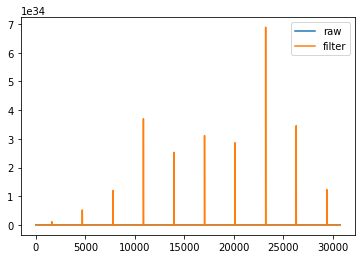

In [218]:
print(np.shape(scaled_filtered))
print(scaled_filtered[1005:1020])
print(np.dtype(filtered_data[0]))

print("m: {}, std: {}".format(np.mean(scaled_filtered), np.std(scaled_filtered)))
print("m: {}, std: {}".format(np.mean(altitude), np.std(altitude)))
diff = np.asarray(altitude[:len(altitude)-1]) - np.asarray(scaled_filtered)
print("mu: {}, std: {}".format(np.mean(diff), np.std(diff)))

plt.plot(np.arange(len(altitude)), altitude, label='raw')
plt.plot(np.arange(len(scaled_filtered)), scaled_filtered, label='filter')
plt.legend()

In [121]:
def Apogee(data):
    for j in range(len(data)-3):
        i = j + 2
        if(data[i] < data[i-1] and data[i-1] < data[i-2]):
            return i
    return -1

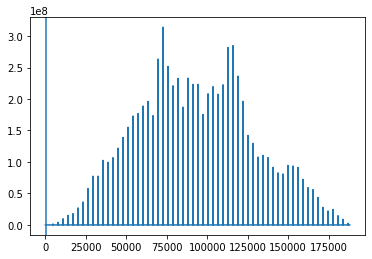

In [123]:
apogee = Apogee(filtered_data)
plt.plot(np.arange(len(filtered_data)), filtered_data)
plt.axvline(apogee)